In [26]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [27]:
df_town = pd.read_csv('../../../data/raw/Town_name_MSA.csv')
df_electri_2022 = pd.read_csv('../../../data/raw/2022 Report - Exported on 10-04-2023.csv')
df_electri_2021 = pd.read_csv('../../../data/raw/2021 Report - Exported on 10-04-2023.csv')
df_electri_2020 = pd.read_csv('../../../data/raw/2020 Report - Exported on 10-04-2023.csv')
df_electri_2019 = pd.read_csv('../../../data/raw/2019 Report - Exported on 10-04-2023.csv')
df_electri_2018 = pd.read_csv('../../../data/raw/2018 Report - Exported on 10-04-2023.csv')
df_electri_2017 = pd.read_csv('../../../data/raw/2017 Report - Exported on 10-04-2023.csv')
df_electri_2016 = pd.read_csv('../../../data/raw/2016 Report - Exported on 10-04-2023.csv')

#df_town=df_town["County Name"]

In [28]:
df_electri_2021.columns = df_electri_2021.iloc[3]  # Set the specified row as column names
df_electri_2021 = df_electri_2021.iloc[4:]
df_electri_2021 = df_electri_2021.reset_index(drop=True)

In [29]:
df_electri_2021=df_electri_2021.apply(pd.to_numeric, errors='ignore')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8656\2975944899.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_electri_2021=df_electri_2021.apply(pd.to_numeric, errors='ignore')


In [30]:
df_electri_2021 = df_electri_2021.dropna(axis=1, how="all")#drop column that only has "NaN" 
df_electri_2021.insert(1,'County Name',df_town["County Name"])

#just change the county name of the five town
df_electri_2021.loc[df_electri_2021['Town Name'] == 'Bridgewater', 'County Name'] = 'Fairfield'
df_electri_2021.loc[df_electri_2021['Town Name'] == 'New Milford', 'County Name'] = 'Fairfield'
df_electri_2021.loc[df_electri_2021['Town Name'] == 'Lyme', 'County Name'] = 'Hartford'
df_electri_2021.loc[df_electri_2021['Town Name'] == 'Old Lyme', 'County Name'] = 'Hartford'
df_electri_2021.loc[df_electri_2021['Town Name'] == 'Colchester', 'County Name'] = 'Hartford'

df_electri_2021

3,Town Name,County Name,Residential Electric Usage ( kWh),Residential Natural Gas Usage (ccf),Commercial Electric Usage ( kWh),Commercial Natural Gas Usage (ccf)
0,Andover,Tolland,11765446,1451,2221638,0
1,Ansonia,New Haven,52380791,3607365,34666410,1196956
2,Ashford,Windham,15458458,0,6670612,0
3,Avon,Hartford,76299636,3729997,64131137,2959398
4,Barkhamsted,Litchfield,13087911,0,4767569,28711
...,...,...,...,...,...,...
164,Windsor Locks,Hartford,36335251,1581407,75880455,37206472
165,Wolcott,New Haven,60085434,182486,19327600,569344
166,Woodbridge,New Haven,40117744,225166,19788935,2653458
167,Woodbury,Litchfield,46634865,44973,12639554,355870


In [31]:
df_electri_2021.columns

Index(['Town Name', 'County Name', 'Residential Electric Usage ( kWh)',
       'Residential Natural Gas Usage (ccf)',
       'Commercial Electric Usage ( kWh)',
       ' Commercial Natural Gas Usage (ccf)'],
      dtype='object', name=3)

In [32]:
resi_elec_sum=df_electri_2021["Residential Electric Usage ( kWh)"].sum()
resi_natur_sum=df_electri_2021["Residential Natural Gas Usage (ccf)"].sum()
com_elec_sum=df_electri_2021["Commercial Electric Usage ( kWh)"].sum()
com_natur_sum=df_electri_2021[' Commercial Natural Gas Usage (ccf)'].sum()

In [33]:
# Group by the 'Category' column
grouped = df_electri_2021.groupby('County Name')

# Now, you can perform various operations on each group
#for category, group in grouped:
    #print(f"County Name: {category}")
    #print(group)

# making grouped data into separate dataframe
grouped_dataframes = {}
for group_name, group_df in grouped:
    grouped_dataframes[group_name] = group_df

In [34]:
#each dataframe has the dataset for county"
grouped_dataframes["Hartford"]
grouped_dataframes["New Haven"]
grouped_dataframes["Tolland"]
grouped_dataframes["Fairfield"]
grouped_dataframes["Middlesex"]

3,Town Name,County Name,Residential Electric Usage ( kWh),Residential Natural Gas Usage (ccf),Commercial Electric Usage ( kWh),Commercial Natural Gas Usage (ccf)
25,Chester,Middlesex,16455095,0,15858142,0
26,Clinton,Middlesex,51202670,415852,29408617,728042
32,Cromwell,Middlesex,50791266,1708436,73698083,2633784
35,Deep River,Middlesex,18365919,18019,20946640,146192
37,Durham,Middlesex,26884261,3915,16710967,365666
39,East Haddam,Middlesex,36008851,0,8476449,0
40,East Hampton,Middlesex,49845637,111864,16362705,659392
49,Essex,Middlesex,30660998,44625,23498070,430326
60,Haddam,Middlesex,31044936,0,9281543,0
69,Killingworth,Middlesex,26428593,0,5409002,0


In [35]:
#calculate the summation of each sector(electricity and residential sectors)

summ=[]

# Define a function to perform the operation on a DataFrame.
def resi_elec(df):
    # Replace this with your desired operation on df.
    return df['Residential Electric Usage ( kWh)'].sum()
def resi_natur(df):
    # Replace this with your desired operation on df.
    return df['Residential Natural Gas Usage (ccf)'].sum()
def com_elec(df):
    # Replace this with your desired operation on df.
    return df['Commercial Electric Usage ( kWh)'].sum()
def com_natur(df):
    # Replace this with your desired operation on df.
    return df[' Commercial Natural Gas Usage (ccf)'].sum()

# Create a dictionary to store the results of the operation for each group.
resi_elec_results = {}
resi_natur_results = {}
com_elec_results = {}
com_natur_results = {}


# Iterate through the grouped DataFrames and apply the operation.
for group_name, group_df in grouped_dataframes.items():
    resi_elec_results[group_name] = resi_elec(group_df)
    resi_natur_results[group_name] = resi_natur(group_df)
    com_elec_results[group_name] = com_elec(group_df)
    com_natur_results[group_name] = com_natur(group_df)

In [36]:
# Define a function to search for 'Hartford' in a dictionary
dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
def find_hartford(dictionary):
    if 'Hartford' in dictionary:
        return dictionary['Hartford']
    else:
        return None

# Iterate through the list of dictionaries and search for 'Hartford'
for i, dictionary in enumerate(dictionaries, start=1):
    hartford_value = find_hartford(dictionary)
    if hartford_value is not None:
        print(f"Dictionary {i}: Value for Hartford is {hartford_value}")
    else:
        print(f"Dictionary {i}: Hartford not found in this dictionary")
        
# Define a function to search for 'Hartford' in a dictionary
dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
def find_Fairfield(dictionary):
    if 'Fairfield' in dictionary:
        return dictionary['Fairfield']
    else:
        return None

# Iterate through the list of dictionaries and search for 'Hartford'
for i, dictionary in enumerate(dictionaries, start=1):
    Fairfield_value = find_Fairfield(dictionary)
    if Fairfield_value is not None:
        print(f"Dictionary {i}: Value for Fairfield is {Fairfield_value}")
    else:
        print(f"Dictionary {i}: Fairfield not found in this dictionary")
        
# Define a function to search for 'Hartford' in a dictionary
dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
def find_Middlesex(dictionary):
    if 'Middlesex' in dictionary:
        return dictionary['Middlesex']
    else:
        return None

# Iterate through the list of dictionaries and search for 'Hartford'
for i, dictionary in enumerate(dictionaries, start=1):
    Middlesex_value = find_Middlesex(dictionary)
    if Middlesex_value is not None:
        print(f"Dictionary {i}: Value for Middlesex is {Middlesex_value}")
    else:
        print(f"Dictionary {i}: Middlesex not found in this dictionary")
        
# Define a function to search for 'Hartford' in a dictionary
dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
def find_New_Haven(dictionary):
    if 'New Haven' in dictionary:
        return dictionary['New Haven']
    else:
        return None

# Iterate through the list of dictionaries and search for 'Hartford'
for i, dictionary in enumerate(dictionaries, start=1):
    New_Haven_value = find_New_Haven(dictionary)
    if New_Haven_value is not None:
        print(f"Dictionary {i}: Value for New_Haven is {New_Haven_value}")
    else:
        print(f"Dictionary {i}: New_Haven not found in this dictionary")
        
# Define a function to search for 'Hartford' in a dictionary
dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
def find_Tolland(dictionary):
    if 'Tolland' in dictionary:
        return dictionary['Tolland']
    else:
        return None

# Iterate through the list of dictionaries and search for 'Hartford'
for i, dictionary in enumerate(dictionaries, start=1):
    Tolland_value = find_Tolland(dictionary)
    if Tolland_value is not None:
        print(f"Dictionary {i}: Value for Tolland is {Tolland_value}")
    else:
        print(f"Dictionary {i}: Tolland not found in this dictionary")

Dictionary 1: Value for Hartford is 2674290061
Dictionary 2: Value for Hartford is 166460562
Dictionary 3: Value for Hartford is 4271047091
Dictionary 4: Value for Hartford is 233247887
Dictionary 1: Value for Fairfield is 3511203402
Dictionary 2: Value for Fairfield is 140449933
Dictionary 3: Value for Fairfield is 3459753129
Dictionary 4: Value for Fairfield is 174167350
Dictionary 1: Value for Middlesex is 607932869
Dictionary 2: Value for Middlesex is 7533354
Dictionary 3: Value for Middlesex is 567780156
Dictionary 4: Value for Middlesex is 25030930
Dictionary 1: Value for New_Haven is 2481066159
Dictionary 2: Value for New_Haven is 120769767
Dictionary 3: Value for New_Haven is 2849324964
Dictionary 4: Value for New_Haven is 157288169
Dictionary 1: Value for Tolland is 460719561
Dictionary 2: Value for Tolland is 4952032
Dictionary 3: Value for Tolland is 290210199
Dictionary 4: Value for Tolland is 8666839


In [37]:
df = pd.DataFrame(dictionaries)
name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
df.insert(0, 'Parameters', name)
df['Total']=df["Fairfield"]+df["Hartford"]+df["Litchfield"]+df["Middlesex"]+df["New Haven"]+df["New London"]+df["Tolland"]+df["Windham"]

HEM = df['Middlesex']+df['New Haven']+df['Tolland']
NHM = df['New Haven']
BSN = df['Fairfield']
df_msa = pd.DataFrame({NHM.name: NHM, HEM.name: HEM, BSN.name: BSN})
name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
df_msa.insert(0, 'Parameters', name)

# New column index
new_columns = ['Utility Consumption', 'New Haven-Milford (NHM)', 'Hartford-East Hartford-Middletown (HEM)','Bridgeport-Stamford-Norwalk (BSN)']

# Assign new column names directly to the .columns attribute
df_msa.columns = new_columns

df_msa["Torrington"] = df['Litchfield']
df_msa["Worcester"] = df['Windham']
df_msa["Norwich-New London"] = df['New London']
df_msa["Statewide"]=df['Total']

NHM_ra = df_msa['New Haven-Milford (NHM)']/df_msa['Statewide']*100
HEM_ra = df_msa['Hartford-East Hartford-Middletown (HEM)']/df_msa['Statewide']*100
BSN_ra = df_msa['Bridgeport-Stamford-Norwalk (BSN)']/df_msa['Statewide']*100

df_msa.insert(2, 'NHM relative to CT (%)', NHM_ra)
df_msa.insert(4, 'HEM relative to CT (%)', HEM_ra)
df_msa.insert(6, 'BSN relative to CT (%)', BSN_ra)

In [38]:
selected_data = df_msa.iloc[[0, 2], [1, 3, 5, 7,8,9,10]]
sum_result = selected_data.iloc[0,:]+selected_data.iloc[1,:]
selected_data.loc['Total'] = sum_result

msa_result = selected_data
msa_result.reset_index(drop=True, inplace=True)
msa_result

,New Haven-Milford (NHM),Hartford-East Hartford-Middletown (HEM),Bridgeport-Stamford-Norwalk (BSN),Torrington,Worcester,Norwich-New London,Statewide
0,2481066159,3549718589,3511203402,638160326,375532975,577269879,11326175232
1,2849324964,3707315319,3459753129,506011781,384466119,715203982,13043797421
2,5330391123,7257033908,6970956531,1144172107,759999094,1292473861,24369972653


In [39]:
rows=['Residential Electric Usage (kWh)','Commercial/Industrial Electric Usage (kWh)','Total (kWh)']
msa_result.insert(0, 'Parameters', rows)
#msa_result.to_csv('../../../data/tidy/emissions-electricity.csv')


In [40]:
msa_result

,Parameters,New Haven-Milford (NHM),Hartford-East Hartford-Middletown (HEM),Bridgeport-Stamford-Norwalk (BSN),Torrington,Worcester,Norwich-New London,Statewide
0,Residential Electric Usage (kWh),2481066159,3549718589,3511203402,638160326,375532975,577269879,11326175232
1,Commercial/Industrial Electric Usage (kWh),2849324964,3707315319,3459753129,506011781,384466119,715203982,13043797421
2,Total (kWh),5330391123,7257033908,6970956531,1144172107,759999094,1292473861,24369972653


In [41]:
msa_result.to_csv('../../../data/tidy/electricity-consumption.csv')

In [42]:
#emissions factor for each gas in year 2021: CO2, CH4, N2O.Ib/MWh
CO2_ef = 539.37
CH4_ef = 0.072
N2O_ef = 0.009
Total_EF = 543.852

ghg_NHM = msa_result['New Haven-Milford (NHM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
ghg_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
ghg_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
ghg_Statewide = msa_result['Statewide']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)


CO2_NHM = msa_result['New Haven-Milford (NHM)']/1000*CO2_ef/2204.62/1000000 #unit (MMTCO2e)
CO2_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*CO2_ef/2204.62/1000000 #unit (MMTCO2e)
CO2_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*CO2_ef/2204.62/1000000 #unit (MMTCO2e)

CH4_NHM = msa_result['New Haven-Milford (NHM)']/1000*CH4_ef*25/2204.62/1000000 #unit (MMTCO2e)
CH4_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*CH4_ef*25/2204.62/1000000 #unit (MMTCO2e)
CH4_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*CH4_ef*25/2204.62/1000000 #unit (MMTCO2e)

N2O_NHM = msa_result['New Haven-Milford (NHM)']/1000*N2O_ef*298/2204.62/1000000 #unit (MMTCO2e)
N2O_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*N2O_ef*298/2204.62/1000000 #unit (MMTCO2e)
N2O_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*N2O_ef*298/2204.62/1000000 #unit (MMTCO2e)

msa_result['New Haven-Milford (NHM)']

0    2481066159
1    2849324964
2    5330391123
Name: New Haven-Milford (NHM), dtype: int64

In [64]:
q=2.48*562.78/2204.62
q

0.6330770835790295

In [43]:
data = {
    'CH4 Emissions (MMTCO2e)_re': [CH4_NHM[0], CH4_HEM[0], CH4_BSN[0]],
    'CH4 Emissions (MMTCO2e)_co': [CH4_NHM[1], CH4_HEM[1], CH4_BSN[1]],
    'CO2 Emissions (MMTCO2e)_re': [CO2_NHM[0],CO2_HEM[0],CO2_BSN[0]],
    'CO2 Emissions (MMTCO2e)_co': [CO2_NHM[1],CO2_HEM[1],CO2_BSN[1]],
    'N2O Emissions (MMTCO2e)_re': [N2O_NHM[0],N2O_HEM[0],N2O_BSN[0]],
    'N2O Emissions (MMTCO2e)_co': [N2O_NHM[1],N2O_HEM[1],N2O_BSN[1]]
}

df = pd.DataFrame(data)
df

,CH4 Emissions (MMTCO2e)_re,CH4 Emissions (MMTCO2e)_co,CO2 Emissions (MMTCO2e)_re,CO2 Emissions (MMTCO2e)_co,N2O Emissions (MMTCO2e)_re,N2O Emissions (MMTCO2e)_co
0,0.002026,0.002326,0.607004,0.697100,0.003018,0.003466
1,0.002898,0.003027,0.868454,0.907011,0.004318,0.004510
2,0.002867,0.002825,0.859031,0.846444,0.004272,0.004209


In [44]:
msa_result['GHG Emissions_NHM (MMTCO2e)'] = ghg_NHM
msa_result['GHG Emissions_HEM (MMTCO2e)'] = ghg_HEM
msa_result['GHG Emissions_BSN (MMTCO2e)'] = ghg_BSN
msa_result['GHG Emissions_Statewide (MMTCO2e)'] = ghg_Statewide

In [45]:
msa_result

,Parameters,New Haven-Milford (NHM),Hartford-East Hartford-Middletown (HEM),Bridgeport-Stamford-Norwalk (BSN),Torrington,Worcester,Norwich-New London,Statewide,GHG Emissions_NHM (MMTCO2e),GHG Emissions_HEM (MMTCO2e),GHG Emissions_BSN (MMTCO2e),GHG Emissions_Statewide (MMTCO2e)
0,Residential Electric Usage (kWh),2481066159,3549718589,3511203402,638160326,375532975,577269879,11326175232,0.612048,0.875671,0.866170,2.794025
1,Commercial/Industrial Electric Usage (kWh),2849324964,3707315319,3459753129,506011781,384466119,715203982,13043797421,0.702893,0.914548,0.853478,3.217741
2,Total (kWh),5330391123,7257033908,6970956531,1144172107,759999094,1292473861,24369972653,1.314940,1.790219,1.719647,6.011765


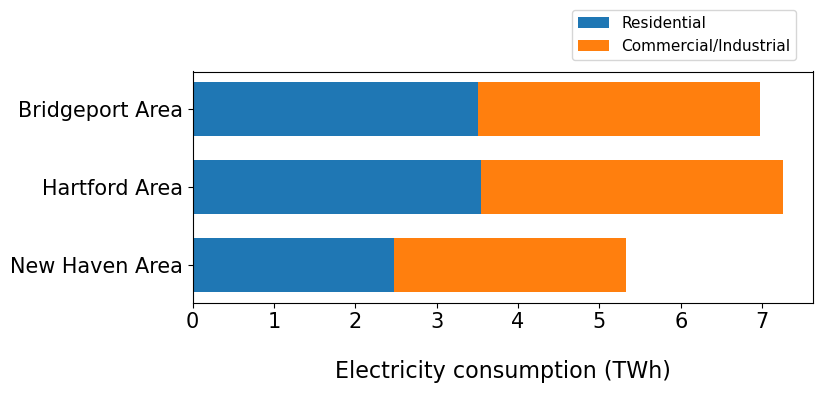

In [46]:
plt.figure(figsize=(8, 3))
X = ['New Haven Area','Hartford Area','Bridgeport Area']

residential = msa_result.iloc[0][1:4]/1000000000#NH, HH, BSN
comm_indu = msa_result.iloc[1][1:4]/1000000000

bar_width = 0.7  # Width of each bar

# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, residential, label='Residential', height=bar_width)
plt.barh(X, comm_indu, left=residential, label='Commercial/Industrial', height=bar_width)

plt.xlabel("Electricity consumption (TWh)",fontsize=16, labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.6, 1.3), fontsize=11)

plt.savefig('../../../figures/Report-images/electricity-consumption.png', dpi=600,bbox_inches='tight')

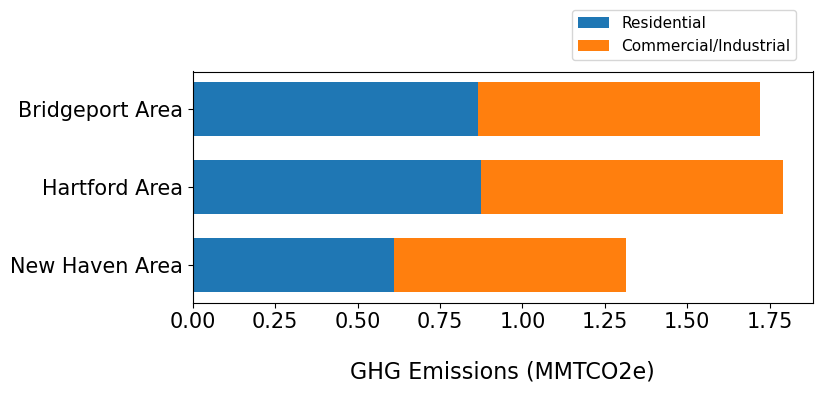

In [47]:
plt.figure(figsize=(8, 3))
X = ['New Haven Area', 'Hartford Area', 'Bridgeport Area']
residential = msa_result.iloc[0][8:11]  # NH, HH, BSN
comm_indu = msa_result.iloc[1][8:11]

# Set the desired width of the bars (adjust this value as needed)
bar_width = 0.7

# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, residential, label='Residential', height=bar_width)
plt.barh(X, comm_indu, left=residential, label='Commercial/Industrial', height=bar_width)


plt.xlabel("GHG Emissions (MMTCO2e)", fontsize=16, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.6, 1.3), fontsize=11)

plt.savefig('../../../figures/Report-images/electricity-consumption-sector.png', dpi=600,bbox_inches='tight')

In [48]:
Bri_MSA_popu = 956446
Hart_MSA_popu = 1213324
NewH_MSA_popu = 864751

In [49]:
#emissions per capita
BSN_capita = msa_result.at[2,'GHG Emissions_BSN (MMTCO2e)']/Bri_MSA_popu*1000000
HEM_capita = msa_result.at[2,'GHG Emissions_HEM (MMTCO2e)']/Hart_MSA_popu*1000000
NHM_capita = msa_result.at[2,'GHG Emissions_NHM (MMTCO2e)']/NewH_MSA_popu*1000000

In [50]:
#emission intensity
BSN_intensity = msa_result.at[2,'GHG Emissions_BSN (MMTCO2e)']/msa_result.at[2,'Bridgeport-Stamford-Norwalk (BSN)']*1000000000
HEM_intensity = msa_result.at[2,'GHG Emissions_HEM (MMTCO2e)']/msa_result.at[2,'Hartford-East Hartford-Middletown (HEM)']*1000000000
NHM_intensity = msa_result.at[2,'GHG Emissions_NHM (MMTCO2e)']/msa_result.at[2,'New Haven-Milford (NHM)']*1000000000

In [51]:
data = {
    'MSA': ['BSN', 'HEM', 'NHM'],
    'Emissions Per Capita (MTCO2e)': [BSN_capita, HEM_capita, NHM_capita],
    'Emissions Intensity (MTCO2e/MWh)': [BSN_intensity, HEM_intensity, NHM_intensity]
}

df = pd.DataFrame(data)


In [52]:
df

,MSA,Emissions Per Capita (MTCO2e),Emissions Intensity (MTCO2e/MWh)
0,BSN,1.797955,0.246687
1,HEM,1.475466,0.246687
2,NHM,1.520600,0.246687


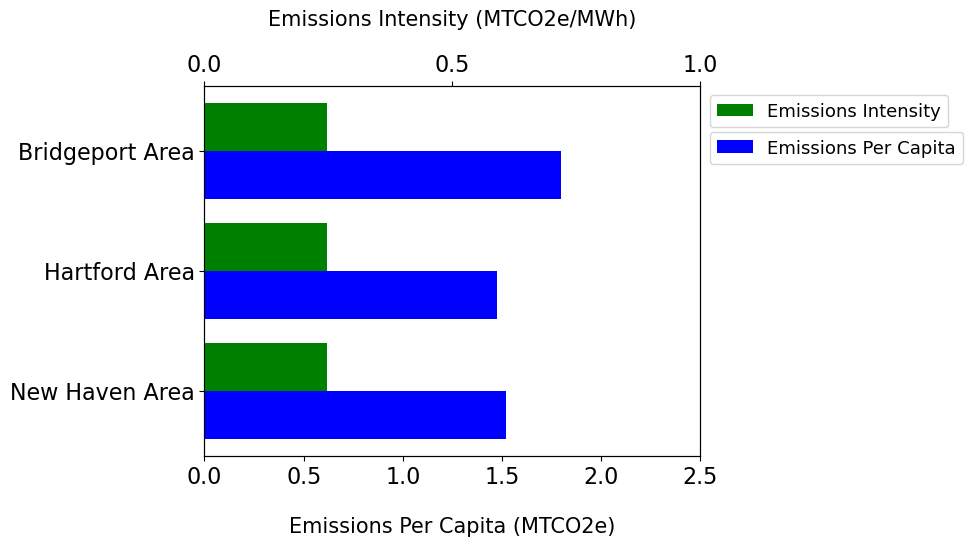

In [53]:

X = ['New Haven Area', 'Hartford Area', 'Bridgeport Area']
Y_axis = np.arange(len(X))

calcualted = df['Emissions Per Capita (MTCO2e)']#NH, HH, BSN
inventory = df['Emissions Intensity (MTCO2e/MWh)']

calcualted=calcualted[::-1]

# Create the first bar plot for Miles Per Capita
fig, ax1 = plt.subplots()

ax1.barh(Y_axis - 0.2, calcualted, 0.4, label='Emissions Per Capita', color='b')

# Set labels and ticks for the first y-axis
ax1.set_xlabel("Emissions Per Capita (MTCO2e)", fontsize=15, labelpad=20)
ax1.set_xticks(np.arange(0, max(calcualted) + 1, 0.5))
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_yticks(Y_axis)
ax1.set_yticklabels(X)

# Create the second y-axis for Emissions Per Capita
ax2 = ax1.twiny()

ax2.barh(Y_axis + 0.2, inventory, 0.4, label='Emissions Intensity', color='g')

# Set labels and ticks for the second y-axis
ax2.set_xlabel("Emissions Intensity (MTCO2e/MWh)", fontsize=15, labelpad=20)
ax2.set_xticks(np.arange(0, max(inventory) + 1, 0.5))
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_yticks(Y_axis)
#ax2.set_yticklabels([])  # Remove y-axis labels for the second y-axis

# Add legends
ax1.legend(loc='upper left',bbox_to_anchor=(1, 0.9),fontsize=13)
ax2.legend(loc='upper left',bbox_to_anchor=(1, 1),fontsize=13)

# Save or display the plot
plt.savefig('../../../figures/Report-images/emissions-electricity-per-capita.png', dpi=600, bbox_inches='tight')
#plt.show()

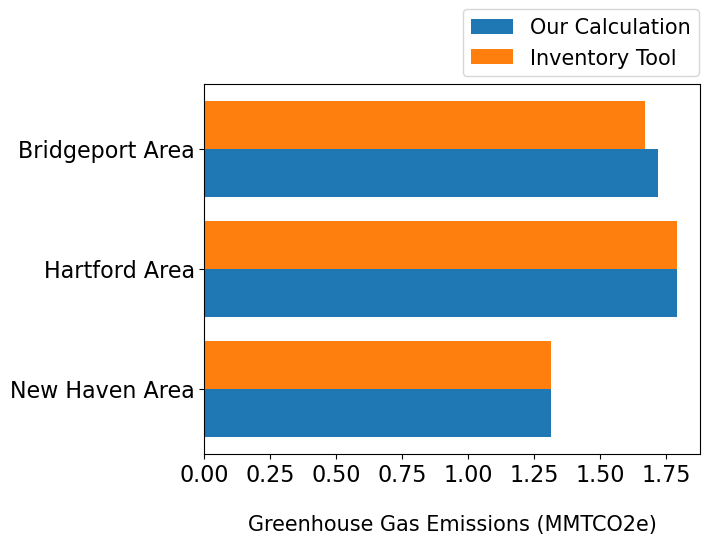

In [54]:
#compare the result with the inventory tool
calcualted = msa_result.iloc[2][8:11]#NH, HH, BSN
inventory = [ 1314735/1000000,1789940/1000000,1671362/1000000]#BSN,

X = ['New Haven Area', 'Hartford Area', 'Bridgeport Area']

Y_axis = np.arange(len(X))

plt.barh(Y_axis - 0.2, calcualted, 0.4, label='Our Calculation')
plt.barh(Y_axis + 0.2, inventory, 0.4, label='Inventory Tool')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.23),fontsize=15)
#plt.show()
plt.savefig('../../../figures/our-model-vs-lggit-electricity-2021.png', dpi=600,bbox_inches='tight')

In [55]:
residential =msa_result.loc[0, ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)','GHG Emissions_BSN (MMTCO2e)']]
commercialindustrial = msa_result.loc[1, ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)','GHG Emissions_BSN (MMTCO2e)']]
total_electricity_emissions = msa_result.loc[2, ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)','GHG Emissions_BSN (MMTCO2e)']]
emissions_capita = df['Emissions Per Capita (MTCO2e)']
emissions_capita.iloc[0], emissions_capita.iloc[-1] = emissions_capita.iloc[-1], emissions_capita.iloc[0]

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8656\1092373012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_capita.iloc[0], emissions_capita.iloc[-1] = emissions_capita.iloc[-1], emissions_capita.iloc[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8656\1092373012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_capita.iloc[0], emissions_capita.iloc[-1] = emissions_capita.iloc[-1], emissions_capita.iloc[0]


In [56]:
#create a dataframe
result = pd.DataFrame({'Residential Electricity Emissions (MMTCO2e)': residential, 'Commercial/Industrial Electricity Emissions (MMTCO2e)': commercialindustrial, 'Total Emissions (MMTCO2e)':total_electricity_emissions})
result = result.reset_index()
new_values = ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
result['index'] = new_values
result['Emissions per capita (MTCO2e)'] = emissions_capita
result.columns.values[0] = 'MSA'

In [57]:
result.to_csv('../../../results/sectors/electricity-consumption-emissions.csv')

In [58]:
result

,MSA,Residential Electricity Emissions (MMTCO2e),Commercial/Industrial Electricity Emissions (MMTCO2e),Total Emissions (MMTCO2e),Emissions per capita (MTCO2e)
0,New Haven-Milford,0.612048,0.702893,1.31494,1.520600
1,Hartford-east Hartford-Middletown,0.875671,0.914548,1.790219,1.475466
2,Bridgeport-Stamford-Norwalk,0.86617,0.853478,1.719647,1.797955
